# Explore Cofffee

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [32]:
import pandas as pd 
import numpy as np

import random

import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# import data
coffee = pd.read_csv("../data/crop/coffee_output.csv")

In [34]:
# TODO: view first 5 rows of your data
coffee.head()

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,Brazil,Minas Gerais,Arabica,16.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
1,Brazil,Espirito Santo,Arabica,2.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
2,Brazil,Espirito Santo,Robusta,7.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
3,Brazil,Sao Paulo,Arabica,3.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
4,Brazil,Parana,Arabica,0.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0


### Data Inspection

In [35]:
# TODO: describe your numeric columns
coffee.describe()

,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
count,114.000000,114.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,8.812281,2012.552632,994.495413,5646.926606,298.055046,2146.513761,2639.027523,3345.082569
std,9.051550,6.265642,310.338484,372.684151,97.572559,96.699000,245.497999,175.124513
min,0.500000,2002.000000,466.000000,4465.000000,148.000000,2010.000000,2106.000000,3030.000000
25%,2.600000,2007.000000,679.000000,5640.000000,205.000000,2070.000000,2552.000000,3191.000000
50%,4.750000,2013.000000,1050.000000,5735.000000,307.000000,2135.000000,2679.000000,3415.000000
75%,12.175000,2018.000000,1185.000000,5810.000000,347.000000,2223.000000,2786.000000,3483.000000
max,34.800000,2023.000000,1510.000000,6200.000000,495.000000,2360.000000,3020.000000,3578.000000


In [36]:
# TODO: display the null values in your dataframe
coffee[coffee.isna().any(axis=1)]

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
84,Brazil,Minas Gerais,Arabica,28.3,2018,NaN,NaN,NaN,NaN,NaN,NaN
85,Brazil,Espirito Santo,Arabica,3.3,2018,NaN,NaN,NaN,NaN,NaN,NaN
86,Brazil,Espirito Santo,Robusta,7.3,2018,NaN,NaN,NaN,NaN,NaN,NaN
87,Brazil,Sao Paulo,Arabica,4.3,2018,NaN,NaN,NaN,NaN,NaN,NaN
88,Brazil,Parana,Arabica,1.3,2018,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# TODO: drop your null values
coffee = coffee.dropna()

In [38]:
# TODO: Select only Minas Gerais

coffee_minas_gerais = coffee[coffee['subdivision'] == 'Minas Gerais'].reset_index(drop=True)

In [39]:
coffee_minas_gerais.head()

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,Brazil,Minas Gerais,Arabica,16.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
1,Brazil,Minas Gerais,Arabica,26.7,2003,1125.0,5265.0,315.0,2360.0,2231.0,3577.0
2,Brazil,Minas Gerais,Arabica,14.4,2004,631.0,5050.0,205.0,2174.0,2323.0,3075.0
3,Brazil,Minas Gerais,Arabica,21.4,2005,466.0,5255.0,148.0,2305.0,2280.0,3149.0
4,Brazil,Minas Gerais,Arabica,16.3,2006,581.0,5330.0,175.0,2298.0,2319.0,3320.0


### Correlation Analysis

In [40]:
correlation = coffee_minas_gerais.corr(method='pearson', numeric_only=True)
display(correlation)

,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
60kgs_bag,1.000000,0.722367,0.410957,0.655343,0.320181,-0.480920,0.697287,0.409031
year,0.722367,1.000000,0.585366,0.777325,0.539492,-0.823846,0.947901,0.150004
nonbearing_trees,0.410957,0.585366,1.000000,0.107709,0.986336,-0.740581,0.438076,0.011004
bearing_trees,0.655343,0.777325,0.107709,1.000000,0.041236,-0.408586,0.903641,0.339703
nonbear_hectares,0.320181,0.539492,0.986336,0.041236,1.000000,-0.729726,0.385166,-0.146205
bearing_hectares,-0.480920,-0.823846,-0.740581,-0.408586,-0.729726,1.000000,-0.758229,0.036045
bearing_trees_per_hectare,0.697287,0.947901,0.438076,0.903641,0.385166,-0.758229,1.000000,0.222826
nonbearing_trees_per_hectare,0.409031,0.150004,0.011004,0.339703,-0.146205,0.036045,0.222826,1.000000


The simplest way to visualize feature correlations is with a heatmap annotated with Pearson’s *r* values, as shown below.  
I used a triangular mask to eliminate duplicate entries and reduce visual clutter.  

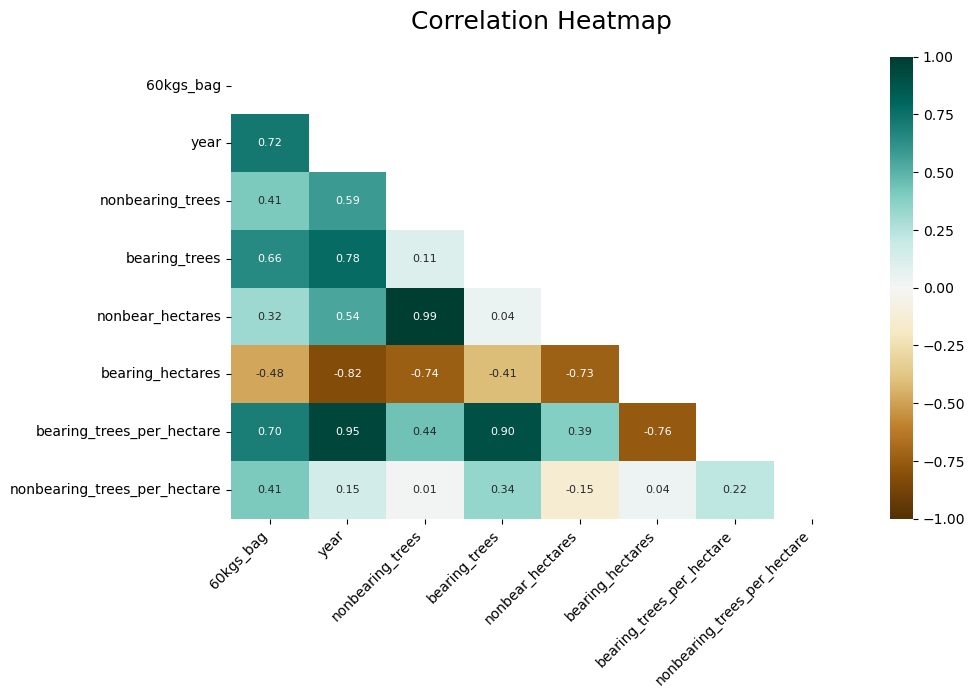

In [41]:
plt.figure(figsize=(10, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(correlation))

sns.heatmap(
    data=correlation,
    mask=mask,
    vmin=-1,
    vmax=1,
    annot=True,
    cmap='BrBG',
    annot_kws={"size": 8},   
    fmt=".2f"                
)

plt.title('Correlation Heatmap', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)              
plt.show()

We can conclude from the heatmap above:

1. **Strong negative correlation:**
   - **Year** vs **Hectares of bearing coffee trees**: **-0.82**

2. **Strong positive correlations:**
   - **Hectares of nonbearing coffee trees** vs **Number of non-bearing trees**: **+0.99**
   - **Average number of bearing trees per hectare** vs **Year**: **+0.95**
   - **Average number of bearing trees per hectare** vs **Amount of bearing coffee trees**: **+0.90**

#### Heatmap: Feature Correlations with Year

The heatmap below illustrates how each coffee harvest feature correlates with the year (2006–2023).  
Features are sorted by Pearson's *r* value, from the strongest positive to the strongest negative correlation.

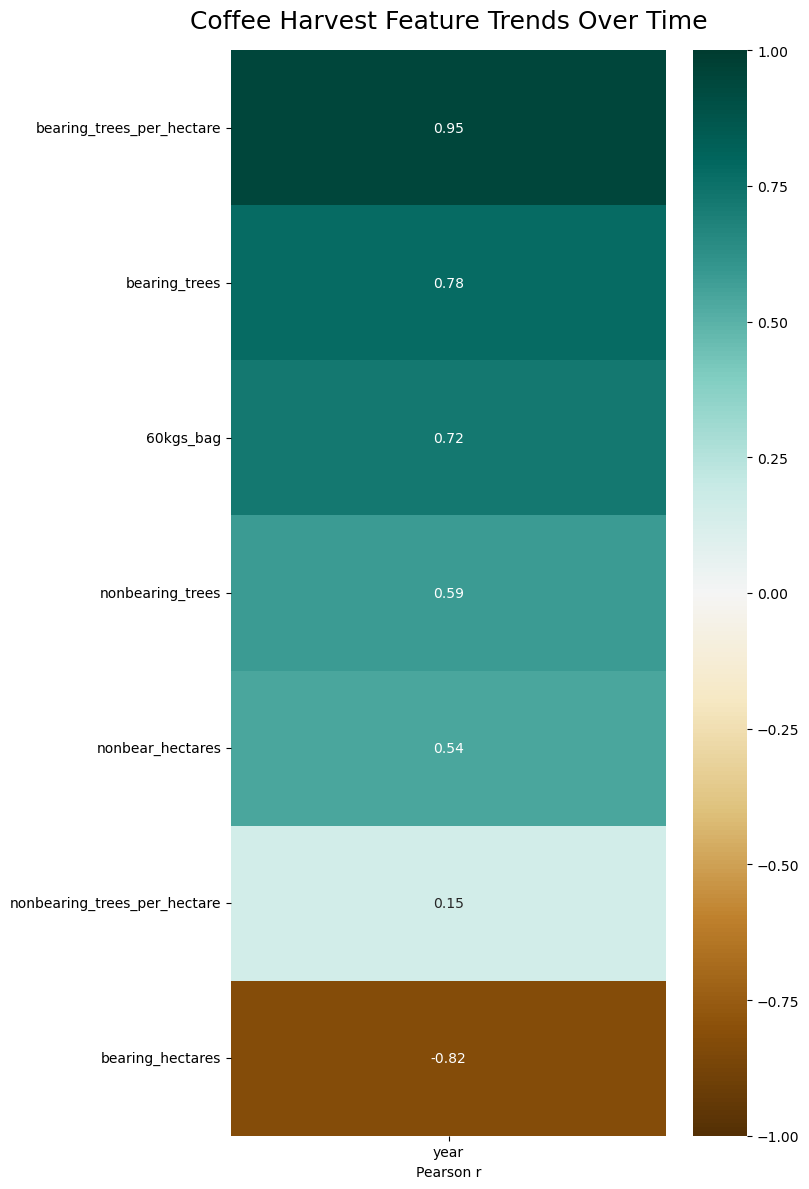

In [42]:
trends_over_time = correlation[['year']].drop('year').sort_values(by='year', ascending=False)
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(
    data=trends_over_time,
    vmin=-1,
    vmax=1,
    annot=True,
    cmap='BrBG',
    fmt=".2f" 
    )
heatmap.set_title('Coffee Harvest Feature Trends Over Time', fontdict={'fontsize':18}, pad=16)
plt.xlabel('Pearson r')
plt.tight_layout()

plt.show()

## Data Visualization

### Univariate Analysis

I chose a line plot with a linear regression fit to highlight trends over time.  
Below is the implementation of a reusable helper function to plot time series with a regression line for multiple features.

In [43]:
# define helper function to plot time-series data with a trend line
def plot_series_with_trend(x, y, line_label, trendline_label, title, x_label, y_label, legend_loc='upper right'):
    '''
    Plots a time-series line graph with an overlaid regression trend line.
    
    Parameters:
    x (pd.Series): Series of years or time values.
    y (pd.Series): Series of numerical values to plot against time.
    line_label (str): Label for the original data line.
    trendline_label (str): Label for the regression trend line.
    title (str): Title of the plot.
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    '''
    
    full_years = pd.Series(range(x.min(), x.max() + 1), name='year')
    df = pd.DataFrame({'year': x, 'value': y}).set_index('year').reindex(full_years).reset_index()
    x = df['year']
    y = df['value']
    
    tick_positions = x[::2] # use every second year to reduce tick crowding
    tick_labels = tick_positions.apply(lambda val: "'" + str(val)[2:]) # show last 2 digits of year
    tick_labels.iloc[0] = str(tick_positions.iloc[0])  # show full year for the first tick
    
    # random color for the trendline
    colors = ['mediumvioletred', 'darkturquoise', 'deeppink', 'goldenrod', 'darkorange', 
              'crimson', 'limegreen', 'dodgerblue', 'orchid', 'slateblue', 'springgreen', 
              'indigo', 'turquoise', 'salmon', 'hotpink', 'rebeccapurple', 'cadetblue']
    trend_color = random.choice(colors)


    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(x, y, color='0.75', marker='o', linestyle='-', label=line_label) 
    sns.regplot(x=x, y=y, ax=ax, color=trend_color, scatter=False, label=trendline_label)

    ax.set_title(title, fontsize=14)
    ax.legend(loc=legend_loc)
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_xticks(ticks=tick_positions)
    ax.set_xticklabels(labels=tick_labels)
    ax.grid(visible=True, linestyle='--', alpha=0.5) 

I used a histogram with an overlaid KDE curve to assess the normality of a numeric variable’s distribution.  
Below is a reusable plotting function to apply this visualization across multiple features.

In [44]:
def plot_distribution(data, column, title, x_label, bins, legend_loc='upper right'):
    '''
    Plots the distribution of a numeric variable using a histogram with a KDE curve.

    Parameters:
    data (pd.DataFrame): DataFrame containing the column.
    column (str): Column name to plot.
    title (str): Title of the plot.
    x_label (str): Label for the x-axis.
    '''
    colors = ['mediumvioletred', 'darkturquoise', 'deeppink', 'goldenrod', 'darkorange', 
              'crimson', 'limegreen', 'dodgerblue', 'orchid', 'slateblue', 'springgreen', 
              'indigo', 'turquoise', 'salmon', 'hotpink', 'rebeccapurple', 'cadetblue']
    dist_color, mean_color, median_color = random.sample(colors, 3)
    
    mean_value = data[column].mean()
    median_value = data[column].median()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(data=data, x=column, bins=bins, kde=True, color=dist_color)
    plt.axvline(mean_value, color=mean_color, linestyle='-', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color=median_color, linestyle='--', linewidth=2,label=f'Median: {median_value:.2f}')
    ax.set_title(label=title, fontsize=14)
    ax.set_xlabel(xlabel=x_label, fontsize=12)
    ax.set_ylabel(ylabel='Frequency', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()

#### 1. Bearing Coffee Trees

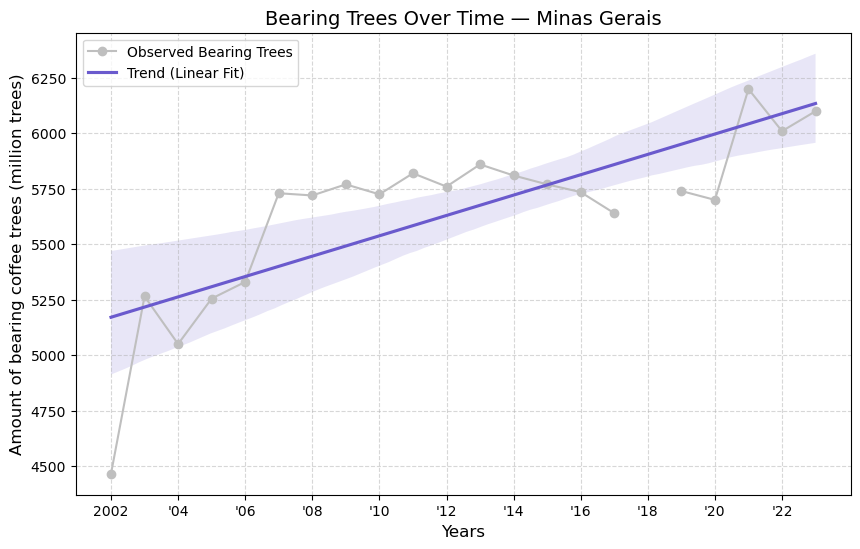

In [45]:
plot_series_with_trend(
    x=coffee_minas_gerais['year'],
    y=coffee_minas_gerais['bearing_trees'],
    line_label='Observed Bearing Trees',
    trendline_label='Trend (Linear Fit)',
    title='Bearing Trees Over Time — Minas Gerais',
    x_label='Years',
    y_label='Amount of bearing coffee trees (million trees)',
    legend_loc='upper left')

The number of bearing coffee trees in Minas Gerais shows an overall **upward** trend over the years, with noticeable declines during 2003–2005 and 2014–2020.

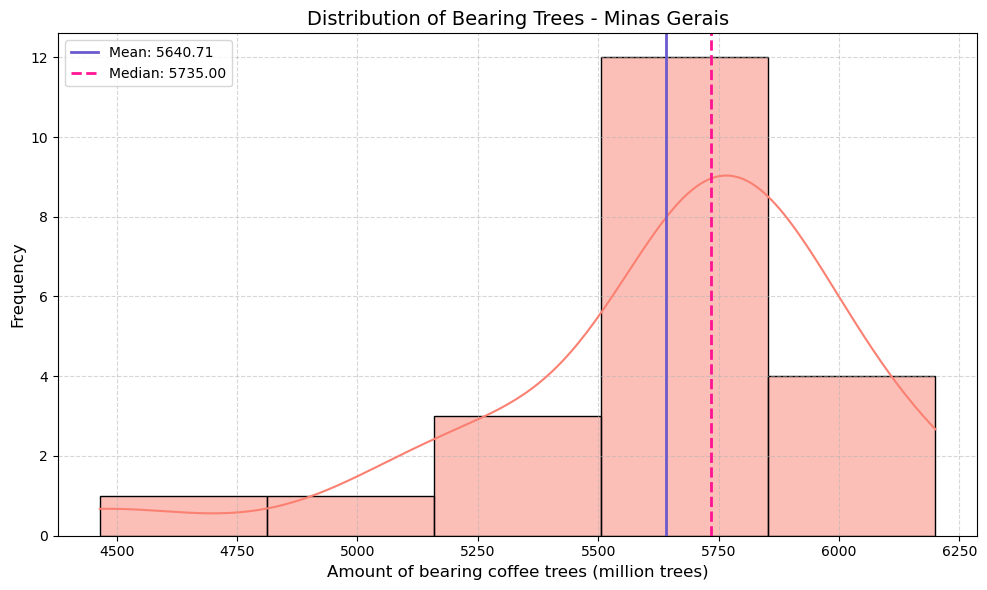

In [62]:
plot_distribution(
    data=coffee_minas_gerais,
    column='bearing_trees',
    title='Distribution of Bearing Trees - Minas Gerais',
    x_label='Amount of bearing coffee trees (million trees)',
    bins=5,
    legend_loc='upper left'
)

The distribution of bearing coffee trees is **right-skewed** and does not follow a normal distribution.

#### 2. Hectares of Bearing Coffee Trees

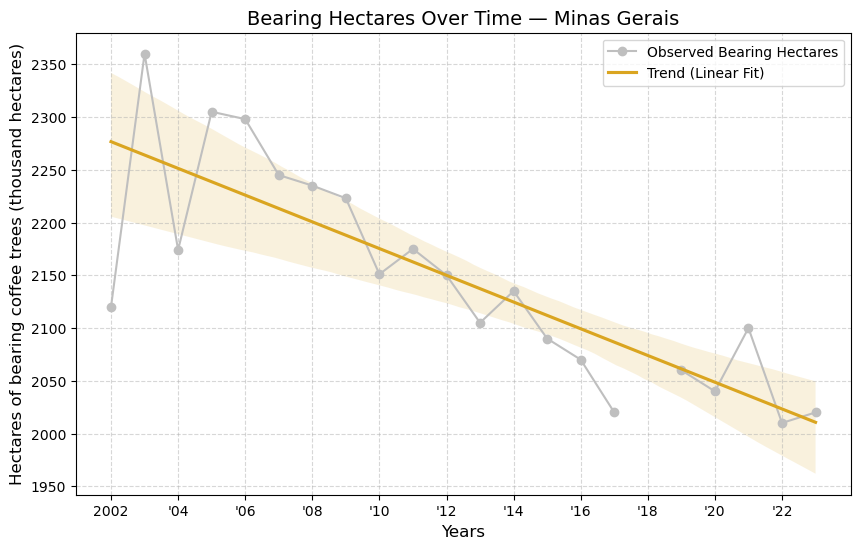

In [47]:
plot_series_with_trend(
    x=coffee_minas_gerais['year'],
    y=coffee_minas_gerais['bearing_hectares'],
    line_label='Observed Bearing Hectares',
    trendline_label='Trend (Linear Fit)',
    title='Bearing Hectares Over Time — Minas Gerais',
    x_label='Years',
    y_label='Hectares of bearing coffee trees (thousand hectares)',
)

The hectares of bearing coffee trees in Minas Gerais shows a **downward** trend over the years.

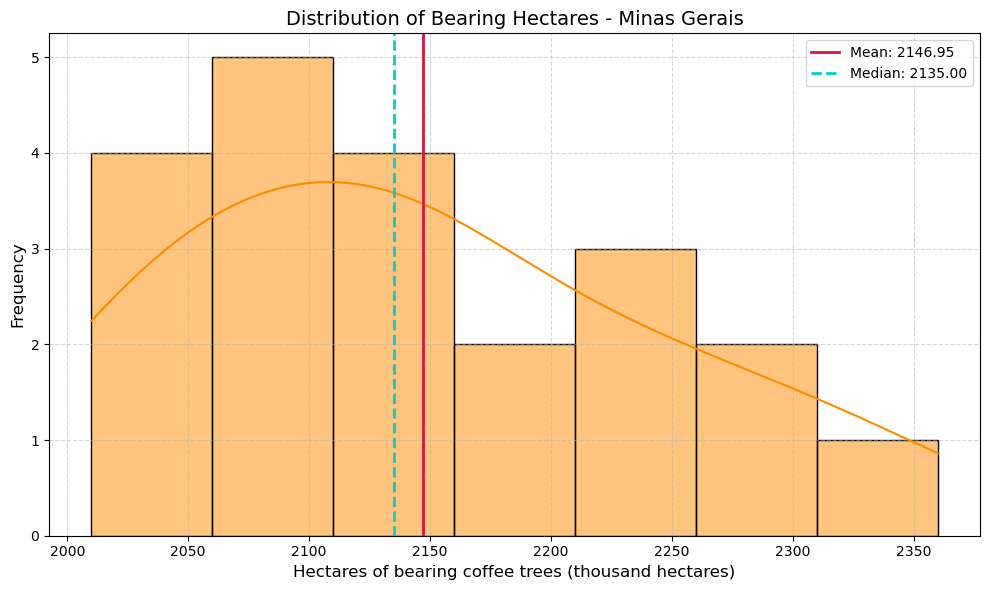

In [65]:
plot_distribution(
    data=coffee_minas_gerais,
    column='bearing_hectares',
    title='Distribution of Bearing Hectares - Minas Gerais',
    x_label='Hectares of bearing coffee trees (thousand hectares)',
    bins=7
    )

The distribution of hectares of bearing coffee trees is **left-skewed** and does not follow a normal distribution.

#### 3. Coffee Beans Harvest

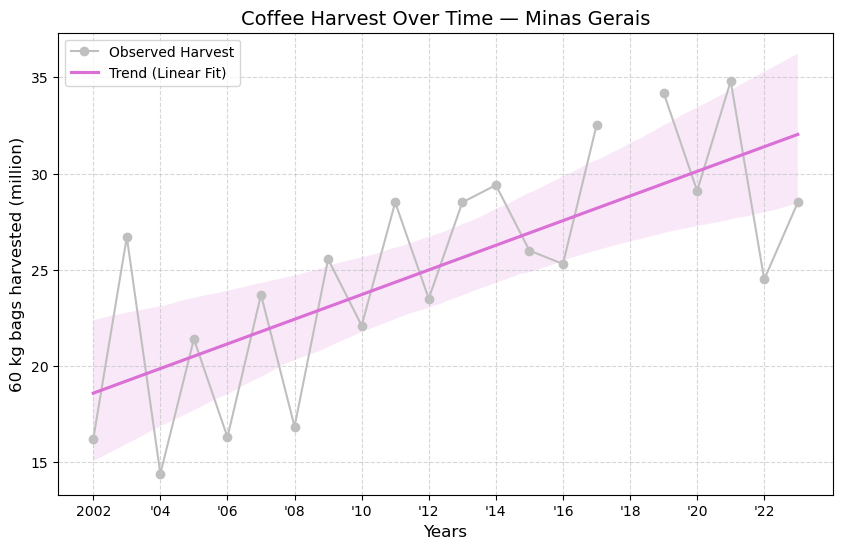

In [49]:
plot_series_with_trend(
    x=coffee_minas_gerais['year'],
    y=coffee_minas_gerais['60kgs_bag'],
    line_label='Observed Harvest',
    trendline_label='Trend (Linear Fit)',
    title='Coffee Harvest Over Time — Minas Gerais',
    x_label='Years',
    y_label='60 kg bags harvested (million)',
    legend_loc='upper left'
)

The amount of coffee harvested in Minas Gerais shows an **upward** trend over the years, with a noticeable decrease in production in 2022.

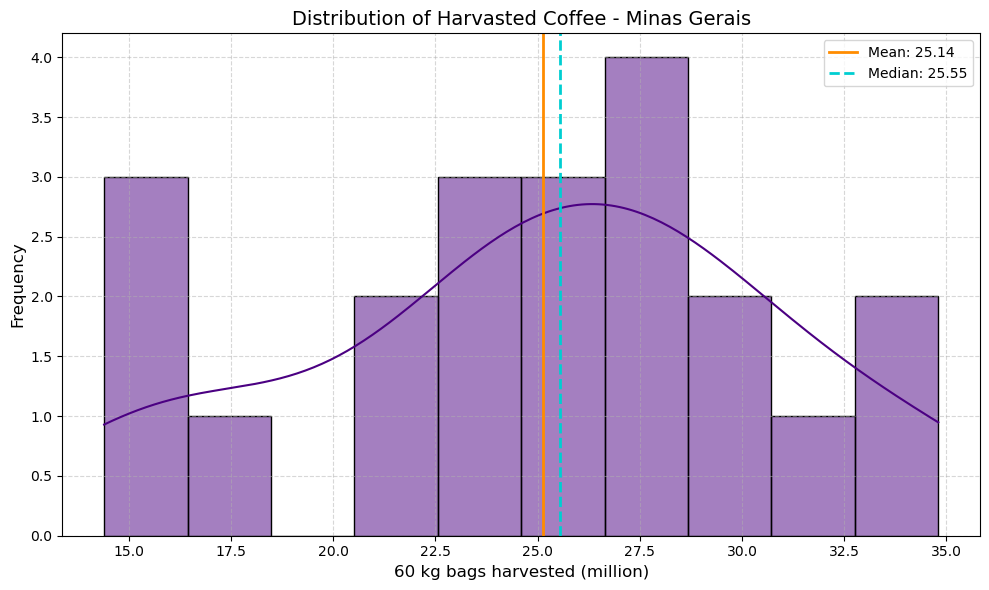

In [69]:
plot_distribution(
    data=coffee_minas_gerais,
    column='60kgs_bag',
    title='Distribution of Harvasted Coffee - Minas Gerais',
    x_label='60 kg bags harvested (million)',
    bins=10
    )

I couldn't immediately tell if the distribution of 60 kg coffee bags was normal just by looking at the plot, so I used the **Shapiro-Wilk test** to statistically assess normality.

In [51]:
from scipy.stats import shapiro

# Test for normality
data = coffee_minas_gerais['60kgs_bag']
stat, p = shapiro(data)

print('Shapiro-Wilk Test:')
print(f'Statistic = {stat:.3f}, p = {p:.3f}')

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test:
Statistic = 0.956, p = 0.436
Sample looks Gaussian (fail to reject H0)


**Shapiro-Wilk Test:** Statistic = 0.956, p = 0.436  
The test indicates that the distribution of 60 kg coffee bags is close to normal (fail to reject H₀).

### Bivariate Analysis

I used two subplots to illustrate the relationship between two features:
- **Normalized time series** showing how both features changed over time  
- **Scatter plot with regression line** highlighting their correlation

Below is an implementation of a reusable plotting function to apply this visualization to multiple feature pairs.

In [52]:
def plot_relationship(series_1,
                      series_2,
                      label_1,
                      label_2,
                      title,
                      legend_loc='upper right'):
    """
    Creates two subplots:
      1) Normalized time series of series_1 & series_2
      2) Scatterplot + regression line of series_2 vs. series_1 with Pearson r

    Parameters:
    series_1 (pd.Series): First variable to compare.
    series_2 (pd.Series): Second variable to compare.
    label_1 (str):     Display name for series_1.
    label_2 (str):     Display name for series_2.
    title (str):       Title for the regression subplot.
    legend_loc (str):  Legend location for both subplots.
    """

    # normalize both series to [0,1]
    s1n = (series_1 - series_1.min()) / (series_1.max() - series_1.min())
    s2n = (series_2 - series_2.min()) / (series_2.max() - series_2.min())

    r = series_1.corr(series_2)

    # prepare x-ticks every 2nd year
    time = coffee_minas_gerais['year']
    ticks = coffee_minas_gerais['year'][::2]
    tick_labels = ticks.apply(lambda v: "'" + str(v)[2:])
    tick_labels.iloc[0] = str(ticks.iloc[0])
    tick_labels.iloc[-1] = str(ticks.iloc[-1])

    # pick three distinct colors
    palette = [
        'mediumvioletred', 'darkturquoise', 'deeppink', 'goldenrod', 
        'darkorange', 'crimson', 'limegreen', 'dodgerblue', 
        'orchid', 'slateblue', 'springgreen', 'tomato', 
        'indigo', 'turquoise', 'salmon', 'hotpink', 
        'rebeccapurple', 'cadetblue'
    ]
    c1, c2, c_trend = random.sample(palette, 3)

    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))

    # Subplot 1: normalized series over time
    ax0.plot(time, s1n, marker='o', linestyle='-', color=c1, label=f'{label_1} (norm)')
    ax0.plot(time, s2n, marker='s', linestyle='--', color=c2, label=f'{label_2} (norm)')
    ax0.set_xticks(ticks)
    ax0.set_xticklabels(tick_labels)
    ax0.set_xlabel('Year', fontsize=12)
    ax0.set_ylabel('Normalized value', fontsize=12)
    ax0.set_title('Normalized Comparison Over Time', fontsize=14)
    ax0.legend(loc=legend_loc)
    ax0.grid(True, linestyle='--', alpha=0.4)

    # Subplot 2: regression scatterplot
    sns.regplot(
        x=series_1,
        y=series_2,
        ax=ax1,
        color=c_trend,
        scatter_kws={'s': 50},
        line_kws={'lw': 2},
        label=f'Pearson r = {r:.2f}'
    )
    ax1.set_xlabel(label_1, fontsize=12)
    ax1.set_ylabel(label_2, fontsize=12)
    ax1.set_title(title, fontsize=14)
    ax1.legend(loc=legend_loc)
    ax1.grid(True, linestyle='--', alpha=0.4)

    plt.tight_layout()
    plt.show()

#### 1. Correlation Between Bearing Trees and Coffee Harvested

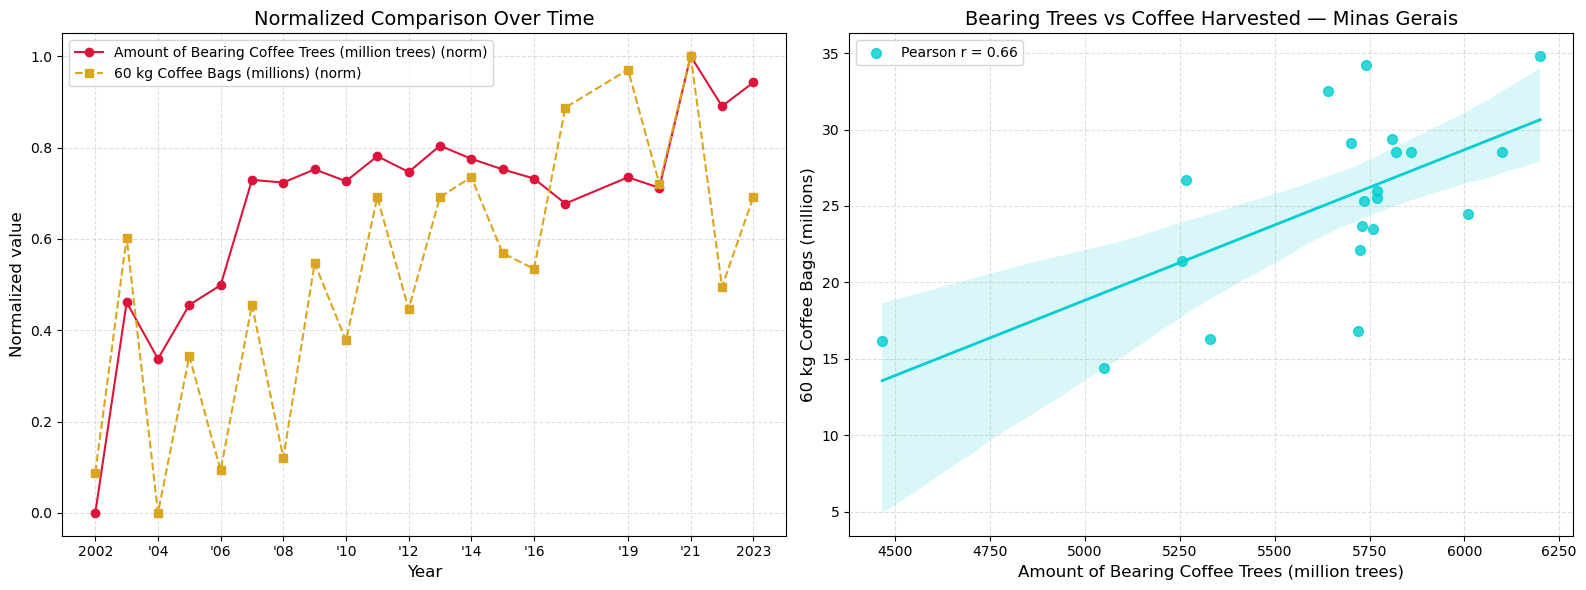

In [53]:
plot_relationship(
    series_1=coffee_minas_gerais['bearing_trees'],
    series_2=coffee_minas_gerais['60kgs_bag'],
    label_1='Amount of Bearing Coffee Trees (million trees)',
    label_2='60 kg Coffee Bags (millions)',
    title='Bearing Trees vs Coffee Harvested — Minas Gerais',
    legend_loc='upper left'
)

Coffee production and the number of bearing trees both increased over time and exhibit a moderate positive correlation.

#### 2. Correlation Between Bearing Hectares and Coffee Harvested

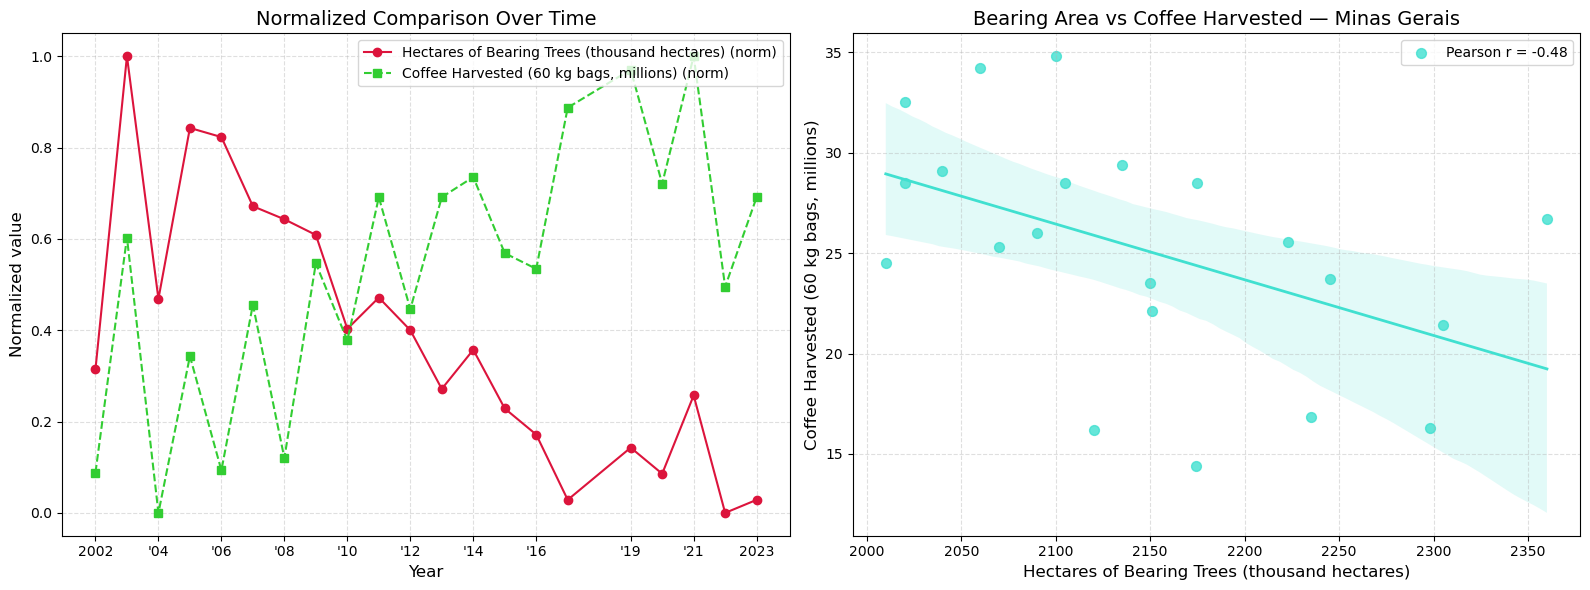

In [54]:
plot_relationship(
    series_1=coffee_minas_gerais['bearing_hectares'],
    series_2=coffee_minas_gerais['60kgs_bag'],
    label_1='Hectares of Bearing Trees (thousand hectares)',
    label_2='Coffee Harvested (60 kg bags, millions)',
    title='Bearing Area vs Coffee Harvested — Minas Gerais'
)

Hectares of bearing trees decrease over time opposite to coffee production with negative correlation.

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

How is bearing trees changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

> The number of bearing trees in Minas Gerais shows an **upward** trend over the years, as seen in the time series plot with the regression line.  
> The distribution is **right-skewed**, with the mean (5,640.71) lower than the median (5,735.00), indicating it is **not normally distributed**.

How is bearing hectares changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

> The hectares of bearing coffee trees in Minas Gerais show a **downward** trend over the years, as seen in the time series plot with the regression line.  
> The distribution is **left-skewed**, with the mean (2,146.95) higher than the median (2,135.00), indicating it is **not normally distributed**.

How is the count of million 60 kg bags of coffee changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

> The count of 60 kg bags of coffee in Minas Gerais shows an **upward** trend over the years, as seen in the time series plot with the regression line.  
> The distribution has a **slight right skew**, with the mean (25.14) slightly lower than the median (25.55).  
> However, the **Shapiro-Wilk test** (p = 0.436) indicates that the distribution **does not significantly deviate from normality**.

What is the relationship between bearing_trees and 60kgs_bag? How *strong* is this relationship? Use Pearson's correlation coefficient.

> There is a **moderate positive correlation** between the number of bearing trees and the amount of coffee harvested in Minas Gerais.  
> This is supported by a Pearson correlation coefficient of **0.66**, which is also reflected in the **regression line** on the scatterplot.

What is the relationship between bearing_hectares and 60kgs_bag? How *strong* is this relationship? Use Pearson's correlation coefficient.

> There is a **moderate negative correlation** between the number of hectares of bearing coffee trees and the amount of coffee harvested in Minas Gerais.  
> This is supported by a Pearson correlation coefficient of **-0.48**, and is clearly reflected in the **regression line** on the scatterplot.

## Appendix
### Pearson Correlation Coefficient

The Pearson correlation coefficient (**r**) measures the strength and direction of the linear relationship between two variables.

| Correlation (r) Range       | Interpretation                                                                  |
|----------------------------|----------------------------------------------------------------------------------|
| **r = +1**                 | The dependent variable *y* is perfectly positively correlated with *x*           |
| **+0.80 < r < +1.00**      | Strong positive correlation                                                      |
| **+0.30 < r ≤ +0.60**      | Moderate positive correlation                                                    |
| **+0.00 < r ≤ +0.30**      | Weak positive correlation                                                        |
| **r = 0**                  | No linear correlation between *x* and *y*                                        |
| **–0.30 < r < 0.00**       | Weak negative correlation                                                        |
| **–0.60 < r ≤ –0.30**      | Moderate negative correlation                                                    |
| **–1.00 < r ≤ –0.80**      | Strong negative correlation                                                      |
| **r = –1**                 | The dependent variable *y* is perfectly negatively correlated with *x*           |

**Source:** Profillidis et al. (2019)